Spam Detection: Build a machine learning model that can detect whether an email is spam or not based on its contents.


In [65]:
import pandas as pd 
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [3]:
df = pd.read_csv('data/SPAM text message 20170820 - Data.csv')

In [5]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.shape

(5572, 2)

In [7]:
df.replace({'ham':0, 'spam':1}, inplace=True)

In [10]:
df.dtypes

Category     int64
Message     object
dtype: object

In [12]:
df_cat_count = df['Category'].value_counts()
df_cat_count

Category
0    4825
1     747
Name: count, dtype: int64

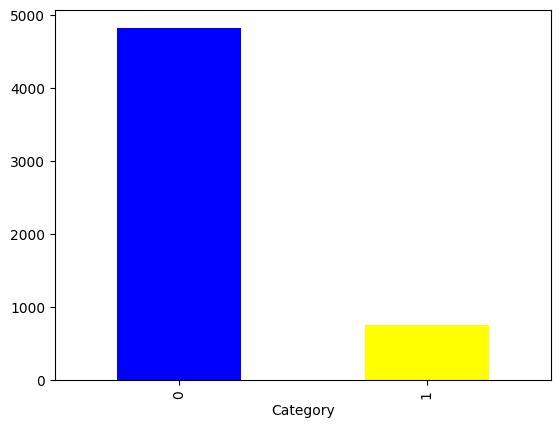

In [16]:
df_cat_count.plot(kind='bar', color=['blue', 'yellow'])
plt.show()

In [17]:
df.Message[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [18]:
stemmer = PorterStemmer()
corpus = [] 

In [19]:
def corpus_preprocessor(corpus):

    for i in range(len(df.Message)):

        review = re.sub('[^a-zA-Z]', ' ', df.Message[i])
        review = review.lower()
        review = review.split()

        review = [stemmer.stem(word) for word in review if not word in stopwords.words('english')]
        review = ' '.join(review)
        corpus.append(review)

In [21]:
corpus_preprocessor(corpus)
corpus[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [22]:
len(corpus)

5572

In [23]:
tf = TfidfVectorizer()

In [29]:
tf.fit(corpus)
x = tf.fit_transform(corpus).toarray()

In [31]:
print(x[3])

[0. 0. 0. ... 0. 0. 0.]


In [33]:
y= df.Category

In [35]:
tf.vocabulary_

{'go': 2171,
 'jurong': 2827,
 'point': 4091,
 'crazi': 1169,
 'avail': 379,
 'bugi': 738,
 'great': 2245,
 'world': 6135,
 'la': 2932,
 'buffet': 736,
 'cine': 964,
 'got': 2208,
 'amor': 190,
 'wat': 5957,
 'ok': 3760,
 'lar': 2960,
 'joke': 2794,
 'wif': 6056,
 'oni': 3785,
 'free': 2007,
 'entri': 1673,
 'wkli': 6101,
 'comp': 1058,
 'win': 6067,
 'fa': 1791,
 'cup': 1220,
 'final': 1890,
 'tkt': 5536,
 'st': 5103,
 'may': 3276,
 'text': 5420,
 'receiv': 4402,
 'question': 4319,
 'std': 5131,
 'txt': 5695,
 'rate': 4364,
 'appli': 262,
 'dun': 1551,
 'say': 4651,
 'earli': 1568,
 'hor': 2477,
 'alreadi': 163,
 'nah': 3532,
 'think': 5468,
 'goe': 2175,
 'usf': 5811,
 'live': 3070,
 'around': 302,
 'though': 5485,
 'freemsg': 2013,
 'hey': 2408,
 'darl': 1267,
 'week': 5992,
 'word': 6129,
 'back': 414,
 'like': 3042,
 'fun': 2059,
 'still': 5152,
 'tb': 5367,
 'xxx': 6202,
 'chg': 922,
 'send': 4721,
 'rcv': 4375,
 'even': 1722,
 'brother': 710,
 'speak': 5037,
 'treat': 5638,
 'ai

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [47]:
def metrics_calculator(y_test, y_pred):
    print ('accuracy:', accuracy_score(y_test, y_pred))
    print ('precision:', precision_score(y_test, y_pred))
    print ('recall:', recall_score(y_test, y_pred))
    print ('confusion matrix:'+'\n', confusion_matrix(y_test, y_pred))
    


In [48]:
x_train.shape, y_train.shape

((4457, 6296), (4457,))

In [49]:
x_test.shape, y_test.shape

((1115, 6296), (1115,))

In [50]:
multiNB = MultinomialNB()

In [51]:
multiNB.fit(x_train, y_train)

MultinomialNB()

In [52]:
y_pred_multiNB = multiNB.predict(x_test)

In [53]:
metrics_calculator(y_test, y_pred_multiNB)

accuracy: 0.9695067264573991
precision: 1.0
recall: 0.7875
confusion matrix:
 [[955   0]
 [ 34 126]]


In [56]:
logreg_model = LogisticRegression()

In [57]:
logreg_model.fit(x_train, y_train)

LogisticRegression()

In [58]:
y_pred_logreg= logreg_model.predict(x_test)

In [59]:
metrics_calculator(y_test, y_pred_logreg)

accuracy: 0.9623318385650225
precision: 0.9836065573770492
recall: 0.75
confusion matrix:
 [[953   2]
 [ 40 120]]


In [60]:
dt_model = RandomForestClassifier()

In [62]:
dt_model.fit(x_train, y_train)

RandomForestClassifier()

In [63]:
y_pred_dt =dt_model.predict(x_test)

In [64]:
metrics_calculator(y_test, y_pred_dt)

accuracy: 0.9820627802690582
precision: 1.0
recall: 0.875
confusion matrix:
 [[955   0]
 [ 20 140]]


In [66]:
svm_model = SVC()

In [67]:
svm_model.fit(x_train, y_train)

SVC()

In [68]:
y_pred_svm = svm_model.predict(x_test)

In [69]:
metrics_calculator(y_test, y_pred_svm)

accuracy: 0.9820627802690582
precision: 1.0
recall: 0.875
confusion matrix:
 [[955   0]
 [ 20 140]]


In [70]:
mlp_model = MLPClassifier(hidden_layer_sizes=(32), solver='adam', alpha = 0.01, random_state=1)

In [71]:
mlp_model.fit(x_train, y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=32, random_state=1)

In [72]:
y_pred_mlp = mlp_model.predict(x_test)

In [73]:
metrics_calculator(y_test, y_pred_mlp)

accuracy: 0.9865470852017937
precision: 1.0
recall: 0.90625
confusion matrix:
 [[955   0]
 [ 15 145]]
